In [96]:
import pandas as pd 
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_csv(r"C:\Users\Tetiana\Documents\ironhack\lab\learningSet.csv")
df.head()

C:\Users\Tetiana\AppData\Local\Temp\ipykernel_33500\276140531.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Tetiana\Documents\ironhack\lab\learningSet.csv")


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [98]:
df.shape

(95412, 481)

In [99]:
df.describe()

,ODATEDW,TCODE,DOB,AGE,NUMCHLD,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
count,95412.000000,95412.000000,95412.000000,71747.000000,12386.000000,74126.000000,50680.000000,95412.000000,42558.000000,42558.000000,...,95412.000000,85439.000000,85439.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95412.000000,95280.000000
mean,9141.363256,54.223117,2723.602933,61.611649,1.527773,3.886248,5.345699,3.321438,0.152075,0.059166,...,9135.651648,9151.022917,8.093739,13.347786,95778.176959,0.050759,0.793073,0.500618,1.910053,31.533711
std,343.454752,953.844476,2132.241295,16.664199,0.806861,1.854960,2.742490,9.306899,0.470023,0.262078,...,320.394019,294.257260,8.213242,10.769997,55284.596094,0.219506,4.429725,0.500002,1.072749,18.764614
min,8306.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7211.000000,0.000000,1.285714,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8801.000000,0.000000,201.000000,48.000000,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,8810.000000,8903.000000,4.000000,8.384615,47910.750000,0.000000,0.000000,0.000000,1.000000,15.000000
50%,9201.000000,1.000000,2610.000000,62.000000,1.000000,4.000000,6.000000,0.000000,0.000000,0.000000,...,9201.000000,9204.000000,6.000000,11.636364,95681.500000,0.000000,0.000000,1.000000,2.000000,32.000000
75%,9501.000000,2.000000,4601.000000,75.000000,2.000000,5.000000,8.000000,3.000000,0.000000,0.000000,...,9409.000000,9409.000000,11.000000,15.477955,143643.500000,0.000000,0.000000,1.000000,3.000000,49.000000
max,9701.000000,72002.000000,9710.000000,98.000000,7.000000,7.000000,9.000000,241.000000,6.000000,4.000000,...,9603.000000,9702.000000,1088.000000,1000.000000,191779.000000,1.000000,200.000000,1.000000,4.000000,62.000000


In [100]:
df.duplicated().sum()

0

In [101]:
df.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=481)

In [102]:
df['OSOURCE'].value_counts(dropna=False)

OSOURCE
MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
       ... 
MDD       1
NRM       1
HDP       1
CRP       1
VIC       1
Name: count, Length: 896, dtype: int64

In [103]:
df.dtypes

ODATEDW       int64
OSOURCE      object
TCODE         int64
STATE        object
ZIP          object
             ...   
MDMAUD_R     object
MDMAUD_F     object
MDMAUD_A     object
CLUSTER2    float64
GEOCODE2     object
Length: 481, dtype: object

In [104]:
df['TARGET_D'].value_counts(dropna=False).sort_values(ascending=False).head(50)




TARGET_D
0.0      90569
10.0       941
15.0       591
20.0       577
5.0        503
25.0       392
12.0       161
7.0        126
6.0        124
11.0       118
8.0        114
30.0        99
21.0        92
3.0         86
16.0        85
14.0        81
4.0         76
9.0         71
50.0        68
13.0        64
17.0        63
23.0        40
35.0        39
18.0        37
19.0        27
40.0        27
26.0        26
22.0        23
100.0       22
2.0         21
24.0        13
32.0        12
12.5        11
36.0         9
27.0         9
45.0         8
38.0         8
1.0          7
75.0         7
28.0         6
37.0         6
47.0         5
200.0        4
51.0         3
31.0         3
33.0         3
60.0         3
29.0         2
41.0         2
42.0         2
Name: count, dtype: int64

In [105]:
df['TARGET_D'].dtypes

dtype('float64')

**Data cleaning**

In [106]:
df.loc[:, df.isna().sum() > 0]

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,...,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,NEXTDATE,TIMELAG,CLUSTER2,GEOCODE2
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0,9.0,9003.0,4.0,39.0,C
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,9504.0,18.0,1.0,A
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,8.0,7.0,6.0,9101.0,12.0,60.0,C
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,6.0,11.0,NaN,NaN,NaN,8711.0,9.0,41.0,C
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8005.0,14.0,26.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,C
95408,48.0,1.0,7.0,9.0,0.0,0.0,1.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,A
95409,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,9501.0,3.0,34.0,B
95410,58.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.0,20.0,NaN,NaN,8704.0,4.0,11.0,A


In [107]:
nulls = pd.DataFrame(df.isna().sum()*100/len(df), columns=['percentage'])
nulls.sort_values('percentage', ascending=False).head(50)

,percentage
RDATE_5,99.990567
RAMNT_5,99.990567
RDATE_3,99.746363
RAMNT_3,99.746363
RDATE_4,99.705488
RAMNT_4,99.705488
RAMNT_6,99.186685
RDATE_6,99.186685
RAMNT_15,92.388798
RDATE_15,92.388798


In [108]:
df[df.columns[df.isna().sum()*100/len(df)>85]]

,NUMCHLD,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_10,RDATE_13,RDATE_15,RDATE_17,...,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_10,RAMNT_13,RAMNT_15,RAMNT_17,RAMNT_20,RAMNT_21,RAMNT_23
0,NaN,NaN,NaN,NaN,NaN,NaN,9512.0,NaN,9505.0,9503.0,...,NaN,NaN,NaN,10.0,NaN,11.0,11.0,NaN,NaN,11.0
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,11.0,6.0,11.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,NaN,NaN,NaN,NaN,NaN,9602.0,NaN,NaN,NaN,NaN,...,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95408,1.0,NaN,NaN,NaN,NaN,9603.0,NaN,NaN,NaN,NaN,...,NaN,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95410,NaN,NaN,9608.0,NaN,NaN,NaN,9512.0,9508.0,9507.0,NaN,...,NaN,NaN,NaN,18.0,20.0,18.0,NaN,NaN,15.0,NaN


In [109]:
nulls[nulls['percentage'].sort_values(ascending=False) > 85]


C:\Users\Tetiana\AppData\Local\Temp\ipykernel_33500\3920242517.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nulls[nulls['percentage'].sort_values(ascending=False) > 85]


,percentage
NUMCHLD,87.018404
RDATE_3,99.746363
RDATE_4,99.705488
RDATE_5,99.990567
RDATE_6,99.186685
RDATE_7,90.677273
RDATE_10,89.035970
RDATE_13,87.160944
RDATE_15,92.388798
RDATE_17,90.146942


In [110]:
df.drop(df.columns[df.isna().sum()*100/len(df)>85], axis=1, inplace=True)

In [111]:
df[df.columns[df.isna().sum()*100/len(df)>85]]

""
0
1
2
3
4
...
95407
95408
95409
95410


In [112]:
df.shape 

(95412, 456)

In [113]:
df.loc[:, df.isna().sum()>1].columns

Index(['AGE', 'INCOME', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS',
       'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN',
       'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2',
       'MSA', 'ADI', 'DMA', 'ADATE_3', 'ADATE_4', 'ADATE_5', 'ADATE_6',
       'ADATE_7', 'ADATE_8', 'ADATE_9', 'ADATE_10', 'ADATE_11', 'ADATE_12',
       'ADATE_13', 'ADATE_14', 'ADATE_15', 'ADATE_16', 'ADATE_17', 'ADATE_18',
       'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24',
       'RDATE_8', 'RDATE_9', 'RDATE_11', 'RDATE_12', 'RDATE_14', 'RDATE_16',
       'RDATE_18', 'RDATE_19', 'RDATE_22', 'RDATE_24', 'RAMNT_8', 'RAMNT_9',
       'RAMNT_11', 'RAMNT_12', 'RAMNT_14', 'RAMNT_16', 'RAMNT_18', 'RAMNT_19',
       'RAMNT_22', 'RAMNT_24', 'NEXTDATE', 'TIMELAG', 'CLUSTER2', 'GEOCODE2'],
      dtype='object')

In [114]:
sorted_unique_values = sorted(df['WEALTH1'].unique(), reverse=True)
sorted_unique_values

[nan, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0]

In [115]:
categorical = df.select_dtypes('object')
categorical

,OSOURCE,STATE,ZIP,MAILCODE,PVASTATE,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,...,RFA_21,RFA_22,RFA_23,RFA_24,RFA_2R,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,GEOCODE2
0,GRI,IL,61081,,,0,,,,,...,S4E,S4E,S4E,S4E,L,E,X,X,X,C
1,BOA,CA,91326,,,0,,,,,...,N1E,N1E,,F1E,L,G,X,X,X,A
2,AMH,NC,27017,,,0,,,,,...,,S4D,S4D,S3D,L,E,X,X,X,C
3,BRY,CA,95953,,,0,,,,,...,A1D,A1D,,,L,E,X,X,X,C
4,,FL,33176,,,0,X,X,,,...,A3D,I4E,A3D,A3D,L,F,X,X,X,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,ASE,AK,99504,,,0,,,,,...,,,,,L,G,X,X,X,C
95408,DCD,TX,77379,,,0,,,,,...,,,,,L,F,X,X,X,A
95409,MBC,MI,48910,,,0,,X,,,...,P1D,P1D,,,L,E,X,X,X,B
95410,PRV,CA,91320,,,0,X,,,,...,A1F,A1F,S2F,S3F,L,F,X,X,X,A


In [116]:
numerical = df.select_dtypes('number')
numerical

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,...,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2F,CLUSTER2
0,8901,0,3712,60.0,NaN,NaN,0,NaN,NaN,NaN,...,8911,9003.0,4.0,7.741935,95515,0,0.0,0,4,39.0
1,9401,1,5202,46.0,6.0,9.0,16,0.0,0.0,3.0,...,9310,9504.0,18.0,15.666667,148535,0,0.0,0,2,1.0
2,9001,1,0,NaN,3.0,1.0,2,0.0,0.0,1.0,...,9001,9101.0,12.0,7.481481,15078,0,0.0,1,4,60.0
3,8701,0,2801,70.0,1.0,4.0,2,0.0,0.0,0.0,...,8702,8711.0,9.0,6.812500,172556,0,0.0,1,4,41.0
4,8601,0,2001,78.0,3.0,2.0,60,1.0,0.0,9.0,...,7903,8005.0,14.0,6.864865,7112,0,0.0,1,2,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,9601,1,0,NaN,NaN,NaN,0,NaN,NaN,NaN,...,9602,NaN,NaN,25.000000,184568,0,0.0,0,1,12.0
95408,9601,1,5001,48.0,7.0,9.0,1,0.0,0.0,1.0,...,9603,NaN,NaN,20.000000,122706,0,0.0,1,1,2.0
95409,9501,1,3801,60.0,NaN,NaN,0,NaN,NaN,NaN,...,9410,9501.0,3.0,8.285714,189641,0,0.0,1,3,34.0
95410,8601,0,4005,58.0,7.0,NaN,0,NaN,NaN,NaN,...,8612,8704.0,4.0,12.146341,4693,1,18.0,1,4,11.0


In [117]:
drop_list=[]
drop_list

[]

In [118]:
drop_list.append(df['OSOURCE'])

In [119]:
drop_list.append(df['ZIP'])
drop_list

[0        GRI
 1        BOA
 2        AMH
 3        BRY
 4           
         ... 
 95407    ASE
 95408    DCD
 95409    MBC
 95410    PRV
 95411    MCC
 Name: OSOURCE, Length: 95412, dtype: object,
 0        61081
 1        91326
 2        27017
 3        95953
 4        33176
          ...  
 95407    99504
 95408    77379
 95409    48910
 95410    91320
 95411    28409
 Name: ZIP, Length: 95412, dtype: object]

In [120]:
df['ZIP']

0        61081
1        91326
2        27017
3        95953
4        33176
         ...  
95407    99504
95408    77379
95409    48910
95410    91320
95411    28409
Name: ZIP, Length: 95412, dtype: object

In [121]:
print(drop_list)

[0        GRI
1        BOA
2        AMH
3        BRY
4           
        ... 
95407    ASE
95408    DCD
95409    MBC
95410    PRV
95411    MCC
Name: OSOURCE, Length: 95412, dtype: object, 0        61081
1        91326
2        27017
3        95953
4        33176
         ...  
95407    99504
95408    77379
95409    48910
95410    91320
95411    28409
Name: ZIP, Length: 95412, dtype: object]


In [122]:
df.columns

Index(['ODATEDW', 'OSOURCE', 'TCODE', 'STATE', 'ZIP', 'MAILCODE', 'PVASTATE',
       'DOB', 'NOEXCH', 'RECINHSE',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=456)

In [123]:
df=df.drop(columns=['OSOURCE','ZIP'])
df.columns

Index(['ODATEDW', 'TCODE', 'STATE', 'MAILCODE', 'PVASTATE', 'DOB', 'NOEXCH',
       'RECINHSE', 'RECP3', 'RECPGVG',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=454)

In [124]:
categorical=categorical.drop(columns=['OSOURCE','ZIP'])
categorical.columns

Index(['STATE', 'MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE', 'RECP3',
       'RECPGVG', 'RECSWEEP', 'MDMAUD', 'DOMAIN', 'CLUSTER', 'AGEFLAG',
       'HOMEOWNR', 'CHILD03', 'CHILD07', 'CHILD12', 'CHILD18', 'GENDER',
       'DATASRCE', 'SOLP3', 'SOLIH', 'MAJOR', 'GEOCODE', 'COLLECT1',
       'VETERANS', 'BIBLE', 'CATLG', 'HOMEE', 'PETS', 'CDPLAY', 'STEREO',
       'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER', 'GARDENIN', 'BOATS', 'WALKER',
       'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC', 'PEPSTRFL', 'RFA_2', 'RFA_3',
       'RFA_4', 'RFA_5', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10',
       'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_15', 'RFA_16', 'RFA_17',
       'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24',
       'RFA_2R', 'RFA_2A', 'MDMAUD_R', 'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')

In [125]:
drop_list1=[]
for col in categorical:
    if len(categorical[col].unique())>=50:
        display(categorical[col].value_counts())
        drop_list1.append(col)

STATE
CA    17343
FL     8376
TX     7535
IL     6420
MI     5654
NC     4160
WA     3577
GA     3403
IN     2980
WI     2795
MO     2712
TN     2492
AZ     2407
OR     2183
MN     2175
CO     2032
SC     1759
AL     1705
KY     1620
OK     1617
LA     1594
KS     1294
IA     1271
AR     1020
MS      986
NV      979
NM      877
NE      754
UT      569
ID      533
MT      527
HI      449
SD      301
WY      283
AK      282
ND      260
AP       81
NY       71
VA       55
OH       52
PA       38
MD       34
NJ       26
MA       25
CT       23
AA       18
AE       15
ME       11
NH        8
VT        7
RI        6
VI        5
WV        4
GU        4
DE        3
DC        1
AS        1
Name: count, dtype: int64

CLUSTER
40    3979
35    3624
36    3617
27    3553
24    3539
49    3315
12    3000
18    2897
13    2706
30    2607
39    2601
45    2515
43    2385
11    2378
51    2322
      2316
14    2246
41    2176
44    1953
16    1947
2     1942
21    1891
8     1828
10    1804
46    1800
28    1630
17    1621
20    1568
53    1441
3     1428
34    1358
42    1358
23    1324
31    1285
22    1282
25    1275
38    1200
15    1173
1     1140
7     1076
5     1014
37     972
26     947
47     868
29     859
32     795
48     787
50     776
9      770
6      603
33     593
4      561
19     497
52     270
Name: count, dtype: int64

RFA_3
A1F    21950
A1G     9184
A2F     6283
F1F     5973
A1E     5119
       ...  
S4B        2
S3C        2
A2C        1
S3B        1
N1C        1
Name: count, Length: 71, dtype: int64

RFA_4
A1F    21818
A1G     9098
A2F     6264
F1F     5998
A1E     5061
       ...  
S2C        4
S3C        3
S4B        2
A3C        2
S3B        1
Name: count, Length: 64, dtype: int64

RFA_6
A1F    15696
F1F     6704
A1G     6634
A1E     5429
A2F     5353
       ...  
U1C        1
P1A        1
A2B        1
P1G        1
I1D        1
Name: count, Length: 109, dtype: int64

RFA_7
A1F    10954
        8874
A1E     6602
A1G     4927
A2F     4830
       ...  
N4C        1
I4D        1
A2B        1
L4C        1
L3C        1
Name: count, Length: 106, dtype: int64

RFA_8
A1F    11312
A1E     6904
A1G     5063
A2F     4961
F1F     3984
       ...  
I4E        2
U1D        1
L4C        1
I3E        1
L3C        1
Name: count, Length: 109, dtype: int64

RFA_9
       11245
A1F     9629
A1E     7038
A1G     4259
A2F     4155
       ...  
A2B        2
A3B        2
N2A        1
U1D        1
I1E        1
Name: count, Length: 107, dtype: int64

RFA_10
       32748
A1F     9204
A1E     6153
A1G     3943
A2F     3516
       ...  
L4F        1
A2B        1
L3D        1
I4C        1
A4B        1
Name: count, Length: 94, dtype: int64

RFA_11
       10422
A1F     9745
A1E     7029
A1G     4144
A2F     3735
       ...  
S3B        8
A4B        4
S2B        4
A3B        3
A2B        2
Name: count, Length: 101, dtype: int64

RFA_12
A1F    9857
       8923
A1E    7121
A1G    4199
A2F    3783
       ... 
S2B       4
A3B       3
A2B       2
U1C       1
F1B       1
Name: count, Length: 107, dtype: int64

RFA_13
       40219
A1F     9066
A1G     3954
A2F     3281
A2E     2695
       ...  
N2C        1
L3G        1
U1G        1
L4E        1
U1F        1
Name: count, Length: 87, dtype: int64

RFA_14
       18867
A1F     8053
A1E     7766
A1G     3740
A1D     3577
       ...  
I3G        4
I3F        3
L2D        3
N2B        1
U1D        1
Name: count, Length: 95, dtype: int64

RFA_16
       20417
A1E     7080
A1F     6445
A1D     3322
A1G     3053
       ...  
S4A        2
I2C        1
S2A        1
P1C        1
I3C        1
Name: count, Length: 123, dtype: int64

RFA_17
       27650
A1E     6773
A1F     5328
A1D     3645
A1G     2305
       ...  
A4B        2
A3B        1
S2A        1
A4A        1
S4A        1
Name: count, Length: 118, dtype: int64

RFA_18
       21263
A1E     7186
A1F     5510
A1D     3941
A1G     2408
       ...  
P1B        1
S2A        1
S3A        1
A4A        1
N3B        1
Name: count, Length: 122, dtype: int64

RFA_19
       24492
A1E     7248
A1F     5347
A1D     4156
A1G     2330
       ...  
A4B        3
P1B        2
S4A        2
L4C        1
A4A        1
Name: count, Length: 108, dtype: int64

RFA_20
       50200
A1E     6408
A1F     4947
A1D     3340
A1G     2193
       ...  
U1E        2
I1G        2
L4E        1
L3F        1
U1D        1
Name: count, Length: 80, dtype: int64

RFA_21
       35212
A1E     6729
A1F     5127
A1D     3607
A1G     2245
       ...  
A4B        2
S3A        2
P1B        2
S4A        2
A4A        1
Name: count, Length: 102, dtype: int64

RFA_22
       25648
A1E     7233
A1F     5324
A1D     4113
A1G     2318
       ...  
S4A        2
A1A        1
F1B        1
L4C        1
A4A        1
Name: count, Length: 117, dtype: int64

RFA_23
       56274
A1F     4607
A1E     4348
A1G     2401
S2E     2243
       ...  
1E         1
N1E        1
2D         1
U1D        1
L1D        1
Name: count, Length: 87, dtype: int64

RFA_24
       36973
A1E     7227
A1F     5032
A1D     4563
F1D     3315
       ...  
N1C        2
U1C        2
A1C        2
U1G        1
L4C        1
Name: count, Length: 97, dtype: int64

In [126]:
print(drop_list1)

['STATE', 'CLUSTER', 'RFA_3', 'RFA_4', 'RFA_6', 'RFA_7', 'RFA_8', 'RFA_9', 'RFA_10', 'RFA_11', 'RFA_12', 'RFA_13', 'RFA_14', 'RFA_16', 'RFA_17', 'RFA_18', 'RFA_19', 'RFA_20', 'RFA_21', 'RFA_22', 'RFA_23', 'RFA_24']


In [127]:
df.columns

Index(['ODATEDW', 'TCODE', 'STATE', 'MAILCODE', 'PVASTATE', 'DOB', 'NOEXCH',
       'RECINHSE', 'RECP3', 'RECPGVG',
       ...
       'TARGET_D', 'HPHONE_D', 'RFA_2R', 'RFA_2F', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'CLUSTER2', 'GEOCODE2'],
      dtype='object', length=454)

In [128]:
df=df.drop(columns=drop_list1)

In [129]:
df['GENDER'].value_counts()
df['GENDER']=df['GENDER'].fillna('F')

In [130]:
df['GENDER'].value_counts(dropna=False)

GENDER
F    51277
M    39094
      2957
U     1715
J      365
C        2
A        2
Name: count, dtype: int64

In [131]:
clean=lambda x: x if x =='F' or x=='M' else 'ohter'
df['GENDER'] = df['GENDER'].apply(clean)



In [132]:
df['GENDER'].value_counts()

GENDER
F        51277
M        39094
ohter     5041
Name: count, dtype: int64

In [133]:
df.shape

(95412, 432)

In [134]:
df.select_dtypes('object').columns

Index(['MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE', 'RECP3', 'RECPGVG',
       'RECSWEEP', 'MDMAUD', 'DOMAIN', 'AGEFLAG', 'HOMEOWNR', 'CHILD03',
       'CHILD07', 'CHILD12', 'CHILD18', 'GENDER', 'DATASRCE', 'SOLP3', 'SOLIH',
       'MAJOR', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE',
       'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER',
       'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC',
       'PEPSTRFL', 'RFA_2', 'RFA_5', 'RFA_15', 'RFA_2R', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')

In [135]:
for col in df.select_dtypes('object'):
    if df[col].isna().sum()>0:
        print (col, df[col].isna().sum())

GEOCODE2 132


In [136]:
df['GEOCODE2'].value_counts(dropna=False)

GEOCODE2
A      34484
B      28505
D      16580
C      15524
         187
NaN      132
Name: count, dtype: int64

In [137]:
clean1=lambda x:x if x in['A','B', 'C', 'D'] else 'A'
df['GEOCODE2']=df['GEOCODE2'].apply(clean1)
df['GEOCODE2'].value_counts(dropna=False)

GEOCODE2
A    34803
B    28505
D    16580
C    15524
Name: count, dtype: int64

In [138]:
df.select_dtypes('number').columns

Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'INCOME', 'WEALTH1', 'HIT', 'MBCRAFT',
       'MBGARDEN', 'MBBOOKS',
       ...
       'FISTDATE', 'NEXTDATE', 'TIMELAG', 'AVGGIFT', 'CONTROLN', 'TARGET_B',
       'TARGET_D', 'HPHONE_D', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=382)

In [139]:
df.select_dtypes('number').isna().sum()

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
INCOME      21286
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 382, dtype: int64

In [140]:
for col in df.select_dtypes('number'):
    if df[col].isna().sum()>0:
        print (col, df[col].isna().sum())
        

AGE 23665
INCOME 21286
WEALTH1 44732
MBCRAFT 52854
MBGARDEN 52854
MBBOOKS 52854
MBCOLECT 52914
MAGFAML 52854
MAGFEM 52854
MAGMALE 52854
PUBGARDN 52854
PUBCULIN 52854
PUBHLTH 52854
PUBDOITY 52854
PUBNEWFN 52854
PUBPHOTO 52854
PUBOPP 52854
WEALTH2 43823
MSA 132
ADI 132
DMA 132
ADATE_3 1950
ADATE_4 2191
ADATE_5 33590
ADATE_6 3557
ADATE_7 8874
ADATE_8 3511
ADATE_9 11245
ADATE_10 32748
ADATE_11 10422
ADATE_12 8923
ADATE_13 40219
ADATE_14 18867
ADATE_15 65477
ADATE_16 20364
ADATE_17 27650
ADATE_18 21263
ADATE_19 24480
ADATE_20 50200
ADATE_21 35212
ADATE_22 25648
ADATE_23 56270
ADATE_24 36973
RDATE_8 73940
RDATE_9 78678
RDATE_11 80672
RDATE_12 69712
RDATE_14 72095
RDATE_16 68418
RDATE_18 75634
RDATE_19 79535
RDATE_22 74539
RDATE_24 77674
RAMNT_8 73940
RAMNT_9 78678
RAMNT_11 80672
RAMNT_12 69712
RAMNT_14 72095
RAMNT_16 68418
RAMNT_18 75634
RAMNT_19 79535
RAMNT_22 74539
RAMNT_24 77674
NEXTDATE 9973
TIMELAG 9973
CLUSTER2 132


In [141]:
df['WEALTH1'].value_counts(dropna=False)

WEALTH1
NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: count, dtype: int64

In [142]:
print(sorted(df['WEALTH1'].unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


In [143]:
df['WEALTH1']=df['WEALTH1'].apply(lambda x: 0 if pd.isna(x) else x)
print(sorted(df['WEALTH1'].unique()))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


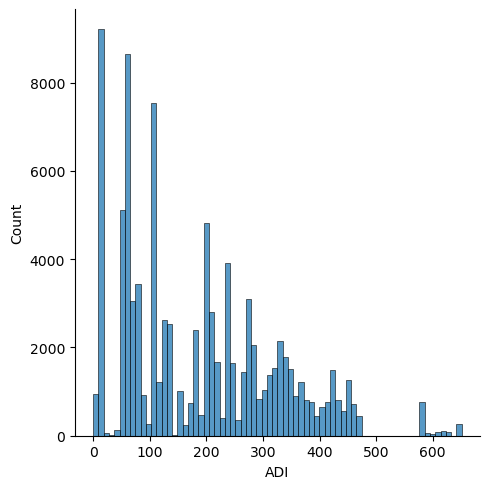

In [144]:
sns.displot(df['ADI'])
plt.show()

In [145]:
df['ADI'].value_counts(dropna=False)

ADI
13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: count, Length: 205, dtype: int64

In [146]:
df['ADI'].isna().sum()

132

In [147]:
df['ADI'].mean()

187.35640218303945

In [148]:
print(sorted(df['ADI'].unique()))

[0.0, 13.0, 15.0, 17.0, 63.0, 69.0, 71.0, 85.0, 95.0, 115.0, 121.0, 123.0, 165.0, 179.0, 205.0, 211.0, 215.0, 217.0, 221.0, 231.0, 237.0, 241.0, 247.0, 253.0, 257.0, 277.0, 303.0, 305.0, 313.0, 319.0, 321.0, 331.0, 337.0, 355.0, 359.0, 363.0, 373.0, 379.0, 389.0, 403.0, 409.0, 413.0, 419.0, 423.0, 431.0, 433.0, 448.0, 451.0, 457.0, 462.0, 465.0, 473.0, 625.0, 627.0, nan, 3.0, 9.0, 11.0, 19.0, 21.0, 25.0, 29.0, 31.0, 33.0, 35.0, 39.0, 43.0, 45.0, 47.0, 51.0, 53.0, 55.0, 57.0, 59.0, 61.0, 65.0, 67.0, 73.0, 75.0, 77.0, 83.0, 87.0, 89.0, 91.0, 93.0, 103.0, 105.0, 107.0, 109.0, 111.0, 113.0, 117.0, 119.0, 127.0, 129.0, 131.0, 133.0, 135.0, 139.0, 140.0, 141.0, 143.0, 145.0, 147.0, 149.0, 151.0, 153.0, 157.0, 159.0, 161.0, 173.0, 175.0, 177.0, 181.0, 183.0, 185.0, 187.0, 195.0, 197.0, 199.0, 201.0, 203.0, 207.0, 209.0, 213.0, 219.0, 227.0, 229.0, 233.0, 235.0, 243.0, 245.0, 249.0, 251.0, 255.0, 261.0, 263.0, 265.0, 269.0, 271.0, 273.0, 275.0, 279.0, 281.0, 283.0, 285.0, 287.0, 291.0, 293.0, 

In [149]:
df['ADI'].interpolate(method='linear', inplace=True)

In [150]:
df['ADI'].isna().sum()

0

In [151]:
print(df['ADI'].dtypes)


float64


C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


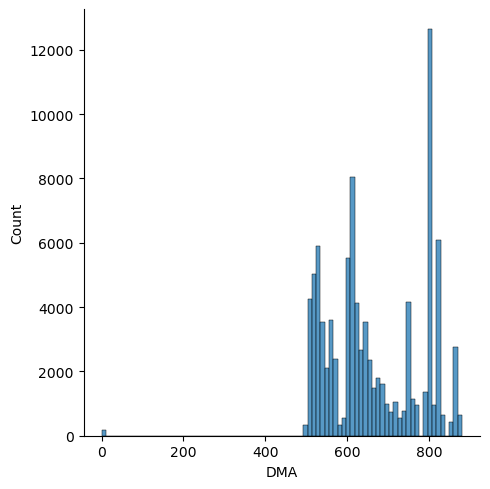

In [152]:
sns.displot(df['DMA'])
plt.show()

In [153]:
df['DMA'].isna().sum()

132

In [154]:
df['DMA'].value_counts(dropna=False)

DMA
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: count, Length: 207, dtype: int64

In [155]:
print(sorted(df['DMA'].unique()))

[0.0, 500.0, 503.0, 505.0, 507.0, 509.0, 512.0, 513.0, 515.0, 517.0, 518.0, 519.0, 520.0, 522.0, 524.0, 525.0, 527.0, 528.0, 529.0, 530.0, 531.0, 534.0, 535.0, 539.0, 540.0, 541.0, 542.0, 544.0, 545.0, 546.0, 547.0, 548.0, 550.0, 551.0, 553.0, 556.0, 557.0, 560.0, 561.0, 563.0, 564.0, 567.0, 570.0, 571.0, 575.0, 581.0, 582.0, 583.0, 588.0, 602.0, 603.0, 604.0, 605.0, 606.0, 609.0, 610.0, 611.0, 612.0, 613.0, 616.0, 617.0, 618.0, 619.0, 620.0, 622.0, 623.0, 624.0, 625.0, 626.0, 627.0, 628.0, 630.0, 631.0, 632.0, 633.0, 634.0, 635.0, 637.0, 638.0, 640.0, 641.0, 642.0, 643.0, 647.0, 648.0, 649.0, 650.0, 652.0, 656.0, 657.0, 658.0, 659.0, 662.0, 669.0, 670.0, 671.0, 675.0, 676.0, 678.0, 679.0, 682.0, 686.0, 687.0, 691.0, 692.0, 693.0, 698.0, 705.0, 709.0, 710.0, 711.0, 716.0, 717.0, 718.0, 722.0, 724.0, 725.0, 743.0, 744.0, 745.0, 746.0, 749.0, 751.0, 752.0, 753.0, 754.0, 755.0, 756.0, 762.0, 764.0, 765.0, 770.0, 771.0, 773.0, 789.0, 790.0, 800.0, 801.0, 803.0, 804.0, 807.0, 810.0, 811.0, 

In [156]:
df['DMA'].interpolate(method='linear', inplace=True)

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


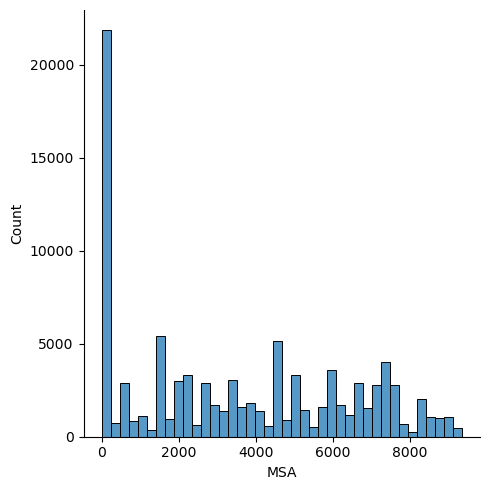

In [157]:
sns.displot(df['MSA'])
plt.show()

In [158]:
df['MSA'].value_counts(dropna=False)

MSA
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: count, Length: 299, dtype: int64

In [159]:
print(sorted(df['MSA'].unique()))

[0.0, 40.0, 200.0, 320.0, 380.0, 440.0, 460.0, 520.0, 600.0, 640.0, 680.0, 720.0, 760.0, 840.0, 860.0, 870.0, 880.0, 920.0, 1000.0, 1020.0, 1040.0, 1125.0, 1145.0, 1150.0, 1360.0, 1400.0, 1520.0, 1560.0, 1600.0, 1620.0, 1640.0, 1720.0, 1920.0, 1960.0, 2020.0, 2030.0, 2080.0, 2160.0, 2180.0, 2240.0, 2320.0, 2330.0, 2440.0, 2520.0, 2580.0, 2620.0, 2640.0, 2655.0, 2670.0, 2680.0, 2710.0, 2720.0, 2750.0, 2760.0, 2800.0, 2840.0, 2920.0, 2985.0, 3000.0, 3120.0, 3160.0, 3285.0, 3290.0, 3320.0, 3360.0, 3400.0, 3440.0, 3480.0, 3500.0, 3560.0, 3600.0, 3605.0, 3660.0, 3710.0, 3720.0, 3760.0, 3800.0, 3880.0, 3920.0, 3960.0, 3980.0, 4040.0, 4080.0, 4100.0, 4120.0, 4200.0, 4400.0, 4420.0, 4480.0, 4520.0, 4680.0, 4720.0, 4890.0, 4920.0, 5000.0, 5080.0, 5120.0, 5160.0, 5200.0, 5280.0, 5360.0, 5560.0, 5775.0, 5790.0, 5800.0, 5880.0, 5910.0, 5920.0, 5945.0, 5960.0, 6080.0, 6120.0, 6200.0, 6440.0, 6580.0, 6640.0, 6720.0, 6760.0, 6780.0, 6880.0, 6920.0, 7040.0, 7080.0, 7160.0, 7240.0, 7320.0, 7360.0, 7400

In [160]:
df['MSA'].interpolate(method='linear',inplace=True)

In [161]:
df['MSA'].isna().sum()

0

In [162]:
df['AGE'].median()

62.0

In [163]:
numeric_cols_with_na = df.select_dtypes('number').columns[df.select_dtypes('number').isna().any()]
filtered_df = df[numeric_cols_with_na]
filtered_df

,AGE,INCOME,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,...,RAMNT_12,RAMNT_14,RAMNT_16,RAMNT_18,RAMNT_19,RAMNT_22,RAMNT_24,NEXTDATE,TIMELAG,CLUSTER2
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10.0,11.0,NaN,NaN,NaN,9.0,9003.0,4.0,39.0
1,46.0,6.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,...,NaN,NaN,12.0,NaN,NaN,NaN,NaN,9504.0,18.0,1.0
2,NaN,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11.0,9.0,9.0,8.0,NaN,8.0,6.0,9101.0,12.0,60.0
3,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,10.0,7.0,NaN,NaN,NaN,NaN,8711.0,9.0,41.0
4,78.0,3.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0,0.0,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,8005.0,14.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0
95408,48.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
95409,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,10.0,NaN,5.0,NaN,9501.0,3.0,34.0
95410,58.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,18.0,15.0,NaN,20.0,NaN,8704.0,4.0,11.0


In [164]:
for col in df.select_dtypes('number'):
    if df[col].isna().sum()>0:
        median_val=df[col].median()
        df[col].fillna(median_val, inplace=True)

In [165]:
for col in df.select_dtypes('number'):
    if df[col].isna().sum()>0:
        print(col, df[col].isna().sum())

In [166]:
df.isna().sum()

ODATEDW     0
TCODE       0
MAILCODE    0
PVASTATE    0
DOB         0
           ..
MDMAUD_R    0
MDMAUD_F    0
MDMAUD_A    0
CLUSTER2    0
GEOCODE2    0
Length: 432, dtype: int64

In [167]:
df.shape

(95412, 432)

In [168]:
for col in df.select_dtypes('object'):
    print(col, df[col].value_counts())

MAILCODE MAILCODE
     94013
B     1399
Name: count, dtype: int64
PVASTATE PVASTATE
     93954
P     1453
E        5
Name: count, dtype: int64
NOEXCH NOEXCH
0    61203
0    33882
1      195
1       90
X       35
         7
Name: count, dtype: int64
RECINHSE RECINHSE
     88709
X     6703
Name: count, dtype: int64
RECP3 RECP3
     93395
X     2017
Name: count, dtype: int64
RECPGVG RECPGVG
     95298
X      114
Name: count, dtype: int64
RECSWEEP RECSWEEP
     93795
X     1617
Name: count, dtype: int64
MDMAUD MDMAUD
XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: count, dtype: int64
DOMAIN DOMAIN
R2    13623
T2    12369
S1    11503
S2     8530
C

In [169]:
df.select_dtypes('object').columns

Index(['MAILCODE', 'PVASTATE', 'NOEXCH', 'RECINHSE', 'RECP3', 'RECPGVG',
       'RECSWEEP', 'MDMAUD', 'DOMAIN', 'AGEFLAG', 'HOMEOWNR', 'CHILD03',
       'CHILD07', 'CHILD12', 'CHILD18', 'GENDER', 'DATASRCE', 'SOLP3', 'SOLIH',
       'MAJOR', 'GEOCODE', 'COLLECT1', 'VETERANS', 'BIBLE', 'CATLG', 'HOMEE',
       'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS', 'FISHER',
       'GARDENIN', 'BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES', 'LIFESRC',
       'PEPSTRFL', 'RFA_2', 'RFA_5', 'RFA_15', 'RFA_2R', 'RFA_2A', 'MDMAUD_R',
       'MDMAUD_F', 'MDMAUD_A', 'GEOCODE2'],
      dtype='object')

In [170]:
for col in ['COLLECT1', 'VETERANS', 'BIBLE', 'CATLG','HOMEE', 'PETS', 'CDPLAY', 'STEREO', 'PCOWNERS', 'PHOTO', 'CRAFTS','FISHER','GARDENIN','BOATS', 'WALKER', 'KIDSTUFF', 'CARDS', 'PLATES']:
    df[col]=df[col].apply(lambda x: 'N' if x == " " else x)
    print(col, df[col].value_counts())

COLLECT1 COLLECT1
N    90210
Y     5202
Name: count, dtype: int64
VETERANS VETERANS
N    84986
Y    10426
Name: count, dtype: int64
BIBLE BIBLE
N    86541
Y     8871
Name: count, dtype: int64
CATLG CATLG
N    87547
Y     7865
Name: count, dtype: int64
HOMEE HOMEE
N    94525
Y      887
Name: count, dtype: int64
PETS PETS
N    81086
Y    14326
Name: count, dtype: int64
CDPLAY CDPLAY
N    83158
Y    12254
Name: count, dtype: int64
STEREO STEREO
N    82618
Y    12794
Name: count, dtype: int64
PCOWNERS PCOWNERS
N    84931
Y    10481
Name: count, dtype: int64
PHOTO PHOTO
N    90626
Y     4786
Name: count, dtype: int64
CRAFTS CRAFTS
N    87236
Y     8176
Name: count, dtype: int64
FISHER FISHER
N    88282
Y     7130
Name: count, dtype: int64
GARDENIN GARDENIN
N    82010
Y    13402
Name: count, dtype: int64
BOATS BOATS
N    93384
Y     2028
Name: count, dtype: int64
WALKER WALKER
N    84911
Y    10501
Name: count, dtype: int64
KIDSTUFF KIDSTUFF
N    93876
Y     1536
Name: count, dtype: int64
CA

In [171]:
df['MAILCODE']=df['MAILCODE'].apply(lambda x: 'Ok' if x==" " else x)
df['MAILCODE'].value_counts()

MAILCODE
Ok    94013
B      1399
Name: count, dtype: int64

In [172]:
df[['GEOCODE2', 'WEALTH1', 'ADI', 'DMA', 'MSA']].dtypes

GEOCODE2     object
WEALTH1     float64
ADI         float64
DMA         float64
MSA         float64
dtype: object

In [173]:
df['MSA'].value_counts()

MSA
0.0       21337
4480.0     4606
1600.0     4059
2160.0     2588
520.0      1685
          ...  
6860.0        1
9000.0        1
9140.0        1
2935.0        1
2480.0        1
Name: count, Length: 369, dtype: int64

In [174]:
df['TARGET_D'].value_counts()

TARGET_D
0.00     90569
10.00      941
15.00      591
20.00      577
5.00       503
         ...  
18.25        1
10.70        1
2.50         1
16.87        1
44.21        1
Name: count, Length: 71, dtype: int64

In [175]:
numerical_df = df.select_dtypes(include=['int', 'float'])
correlation_with_target = numerical_df.corr()['TARGET_D'].sort_values(ascending=False)
correlation_with_target

TARGET_D    1.000000
TARGET_B    0.774232
LASTGIFT    0.061678
RAMNTALL    0.044810
AVGGIFT     0.044299
              ...   
IC15       -0.025528
EC4        -0.026064
CLUSTER2   -0.029085
ADATE_5          NaN
ADATE_15         NaN
Name: TARGET_D, Length: 382, dtype: float64

In [176]:
correlation_with_target[correlation_with_target>0].dropna()

TARGET_D    1.000000
TARGET_B    0.774232
LASTGIFT    0.061678
RAMNTALL    0.044810
AVGGIFT     0.044299
              ...   
HUR1        0.000269
TPE7        0.000232
TCODE       0.000158
AFC2        0.000101
DW2         0.000059
Name: TARGET_D, Length: 232, dtype: float64

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


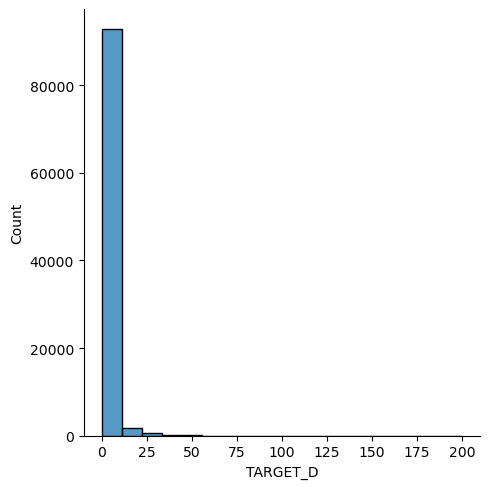

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


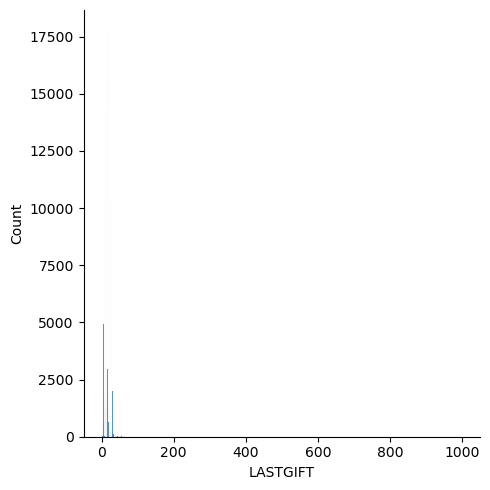

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


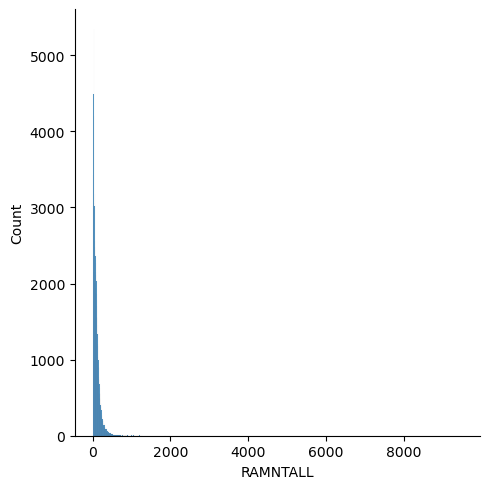

C:\Users\Tetiana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


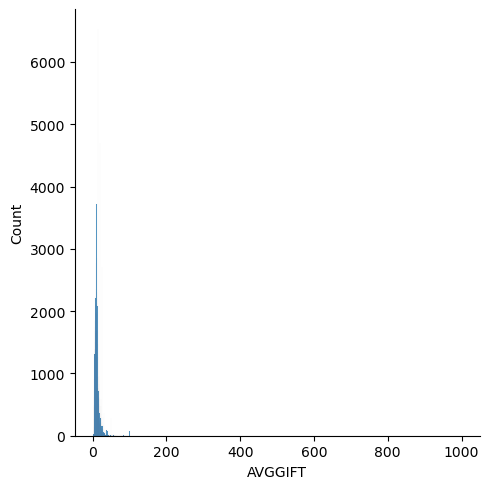

In [177]:
col_plot=['TARGET_D', 'LASTGIFT', 'RAMNTALL', 'AVGGIFT']
for col in col_plot:
    sns.displot(df[col])
    plt.show()

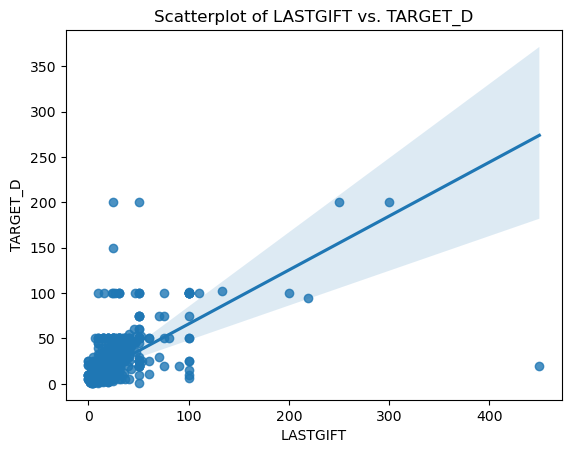

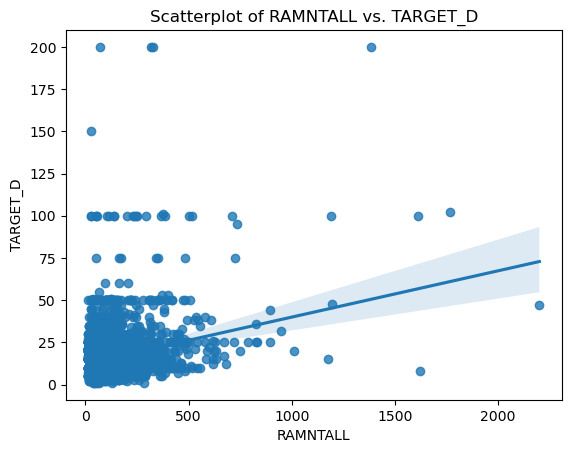

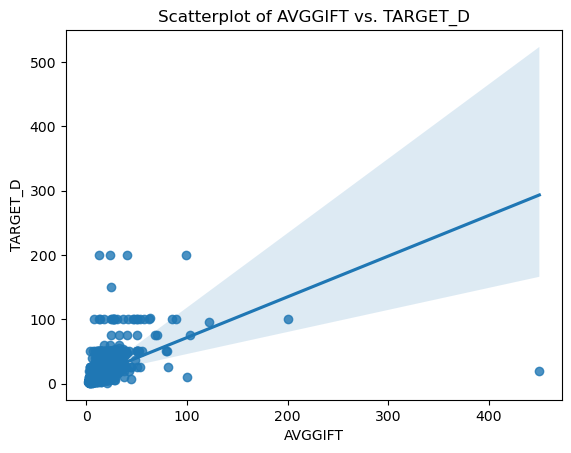

In [178]:
target='TARGET_D'
for col in col_plot:
    if col==target:
        continue
    filtered_data=df[df['TARGET_D']>0]
    sns.regplot(x=col, y=target, data=filtered_data)
    plt.title(f'Scatterplot of {col} vs. {target}')
    plt.xlabel(col)
    plt.ylabel(target)
    plt.show()